In [7]:
pip install category_encoders==2.6.1

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   -------------- ------------------------- 30.7/81.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 71.7/81.9 kB 787.7 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 573.6 kB/s eta 0:00:00
  Attempting uninstall: category_encoders
    Found existing installation: category_encoders 2.8.1
    Uninstalling category_encoders-2.8.1:
      Successfully uninstalled category_encoders-2.8.1
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import category_encoders as ce
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('car_evaluation.csv')

In [11]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
x=data.drop(['class'],axis=1)
y=data['class']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
x_train.shape,x_test.shape

((1208, 6), (519, 6))

In [18]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

c:\Users\hp\anaconda3\Lib\site-packages\category_encoders\ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(-1, inplace=True)
c:\Users\hp\anaconda3\Lib\site-packages\category_encoders\ordinal.py:210: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [19]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\ngini = 0.581\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 3.5\ngini = 0.632\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.634\nsamples = 406\nvalue = [216.0, 52.0, 96.0, 42.0]'),
 Text(0.5, 0.125, 'gini = 0.458\nsamples = 141\nvalue = [50, 0, 91, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

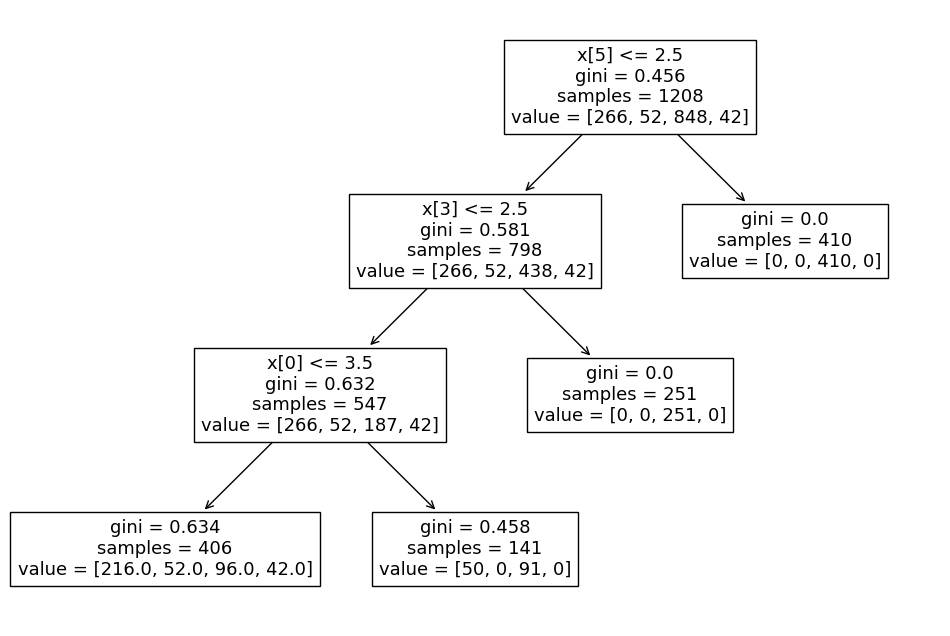

In [20]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(x_train, y_train))

In [21]:
y_pred = clf.predict(x_test)


In [22]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.8150
